In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rc('font', size=14)

In [5]:
dataset = 'mnist'
# dataset = 'fashion'

In [6]:
fedavg_loss = np.load(f'./{dataset}/qFedAvg/train_loss.npy')
fedavg_acc = np.load(f'./{dataset}/qFedAvg/train_acc.npy')
central_loss = np.load(f'./{dataset}/central/train_loss.npy')
central_acc = np.load(f'./{dataset}/central/train_acc.npy')

qfedinf_loss = np.load(f'./{dataset}/qFedInf/test_loss.npy')
qfedinf_acc = np.load(f'./{dataset}/qFedInf/test_acc.npy')

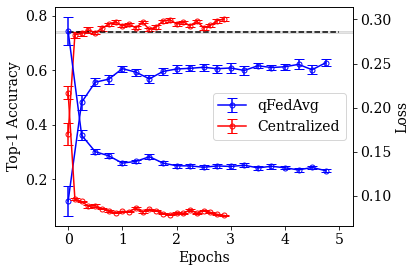

In [7]:
plt.errorbar(np.arange(fedavg_acc.shape[1])/4, np.mean(fedavg_acc, axis=0), yerr=np.std(fedavg_acc, axis=0), label='qFedAvg', marker='o', ms=5, mfc='none', capsize=5, color='blue')
plt.errorbar(np.arange(central_acc.shape[1])/8, np.mean(central_acc, axis=0), yerr=np.std(central_acc, axis=0), label='Centralized', marker='o', ms=5, mfc='none', capsize=5, color='red')
plt.hlines(np.mean(qfedinf_acc), 0, 5, linestyles='dashed', colors='black')
plt.axhspan(np.mean(qfedinf_acc) - np.std(qfedinf_acc), np.mean(qfedinf_acc) + np.std(qfedinf_acc), color='gray', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Top-1 Accuracy')
plt.twinx()
plt.errorbar(np.arange(fedavg_loss.shape[1])/4, np.mean(fedavg_loss, axis=0), yerr=np.std(fedavg_loss, axis=0), label='qFedAvg', marker='o', ms=5, mfc='none', capsize=5, color='blue')
plt.errorbar(np.arange(central_loss.shape[1])/8, np.mean(central_loss, axis=0), yerr=np.std(central_loss, axis=0), label='Centralized', marker='o', ms=5, mfc='none', capsize=5, color='red')
# plt.hlines(np.mean(qfedinf_loss), 0, 5, linestyles='dashed', colors='black', label='qFedInf')
# plt.axhspan(np.mean(qfedinf_loss) - np.std(qfedinf_loss), np.mean(qfedinf_loss) + np.std(qfedinf_loss), color='gray', alpha=0.2)
plt.xticks(np.arange(6))
plt.legend(loc='center right')
plt.ylabel('Loss')
plt.tight_layout()
plt.savefig(f'./{dataset}/cent_fedavg.pdf')
plt.show()

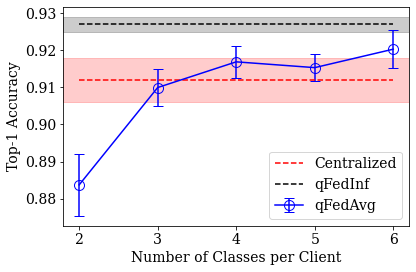

In [27]:
mnist_noniid_avg_acc = [0.8836914300918579, 0.909960925579071, 0.9168945550918579, 0.915332019329071, 0.9203125238418579]
mnist_noniid_std_acc = [0.008360310457646847, 0.004956475459039211, 0.004266806878149509, 0.00373271806165576, 0.005059310235083103]
plt.errorbar(np.arange(5), mnist_noniid_avg_acc, yerr=mnist_noniid_std_acc, label='qFedAvg', marker='o', ms=10, mfc='none', capsize=5, color='blue')
plt.hlines(0.912, 0, 4, linestyles='dashed', colors='red', label='Centralized')
plt.axhspan(0.912 - 0.006, 0.912 + 0.006, color='red', alpha=0.2)
plt.hlines(0.927, 0, 4, linestyles='dashed', colors='black', label='qFedInf')
plt.axhspan(0.927 - 0.002, 0.927 + 0.002, color='black', alpha=0.2)
plt.xlabel('Number of Classes per Client')
plt.xticks(np.arange(5), np.arange(5)+2)
plt.ylabel('Top-1 Accuracy')
plt.tight_layout()
plt.legend()
plt.savefig(f'./mnist/noniid.pdf')
plt.show()

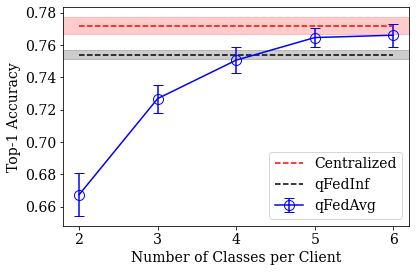

In [22]:
mnist_noniid_avg_acc = [0.66748046875, 0.726855456829071, 0.7505859732627869, 0.7645508050918579, 0.7660156488418579]
mnist_noniid_std_acc = [0.013118327595293522, 0.008614255115389824, 0.00792400911450386, 0.006011216901242733, 0.007165600545704365]
plt.errorbar(np.arange(5), mnist_noniid_avg_acc, yerr=mnist_noniid_std_acc, label='qFedAvg', marker='o', ms=10, mfc='none', capsize=5, color='blue')
plt.hlines(0.772, 0, 4, linestyles='dashed', colors='red', label='Centralized')
plt.axhspan(0.772 - 0.005, 0.772 + 0.005, color='red', alpha=0.2)
plt.hlines(0.754, 0, 4, linestyles='dashed', colors='black', label='qFedInf')
plt.axhspan(0.754 - 0.003, 0.754 + 0.003, color='black', alpha=0.2)
plt.xlabel('Number of Classes per Client')
plt.xticks(np.arange(5), np.arange(5)+2)
plt.ylabel('Top-1 Accuracy')
plt.tight_layout()
plt.legend()
plt.savefig(f'./fashion/noniid.pdf')
plt.show()